### Exploratory Data Analysis of Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Basic information about the dataset

In [3]:
print(titanic.shape,'\n') 
print(titanic.info(),'\n') # there are columns with nan
print(titanic.isna().sum(),'\n') # where and how many nan
print(titanic.dtypes)

(891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          

#### Question 1: How many survived?

In [4]:
x = titanic.Survived.value_counts()

# Calculating the percentage of survived / not survived
not_surv = (x[0]/len(titanic.Survived))*100
surv = (x[1]/len(titanic.Survived))*100

# Print
print('Survived {} passengers, that is {:.2f}% of total passengers'.format(x[1], surv))
print('Not survived {} passengers, that is {:.2f}% of total passengers'.format(x[0], not_surv))

Survived 342 passengers, that is 38.38% of total passengers
Not survived 549 passengers, that is 61.62% of total passengers


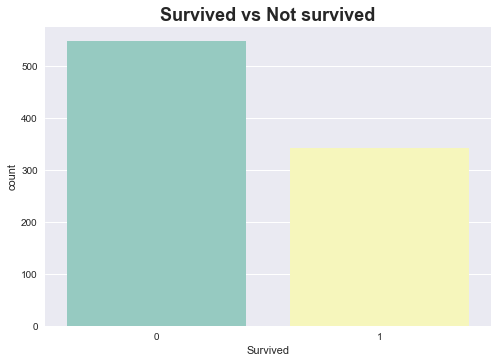

In [5]:
# Plotting the above
plt.style.use('seaborn')
ax = sns.countplot('Survived', data = titanic, palette = 'Set3')
plt.title('Survived vs Not survived',fontdict={'fontweight': 'bold',
                                              'fontsize': 18})
plt.show()

###### Analysis
It is clear that more than half of passengers did not survived. 

#### Question 2: How many cases of classes we have

In [6]:
p = titanic.Pclass.value_counts().sort_index()

# Calculating the percentage of each class
class1 = (p[1]/len(titanic.Pclass))*100
class2 = (p[2]/len(titanic.Pclass))*100
class3 = (p[3]/len(titanic.Pclass))*100

# Print
print('There are {} Class 1 cabins, that is {:.2f}% of total cabins'.format(p[1], class1))
print('There are {} Class 2 cabins, that is {:.2f}% of total cabins'.format(p[2], class2))
print('There are {} Class 3 cabins, that is {:.2f}% of total cabins'.format(p[3], class3))

There are 216 Class 1 cabins, that is 24.24% of total cabins
There are 184 Class 2 cabins, that is 20.65% of total cabins
There are 491 Class 3 cabins, that is 55.11% of total cabins


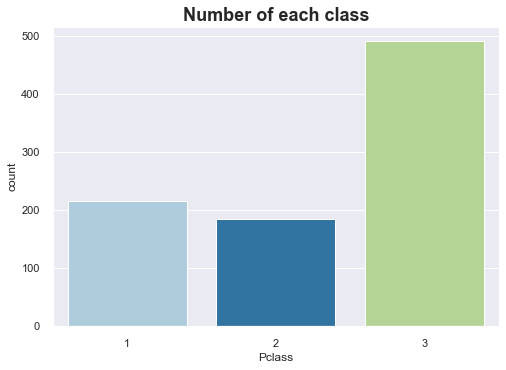

In [7]:
# Plotting the above
sns.set(style = 'darkgrid')
sns.countplot('Pclass', data = titanic, palette = 'Paired')
plt.title('Number of each class',fontdict={'fontweight': 'bold',
                                              'fontsize': 18})
plt.show()

#### Question 3: How many passengers by gender

In [8]:
s = titanic.Sex.value_counts()

# Calculating the percentage of each class
male = (s[0]/len(titanic.Sex))*100
female = (s[1]/len(titanic.Sex))*100

# Print1
print('There are {} male, that is {:.2f}% of total passengers'.format(s[0], male))
print('There are {} female, that is {:.2f}% of total passengers'.format(s[1], female))

There are 577 male, that is 64.76% of total passengers
There are 314 female, that is 35.24% of total passengers


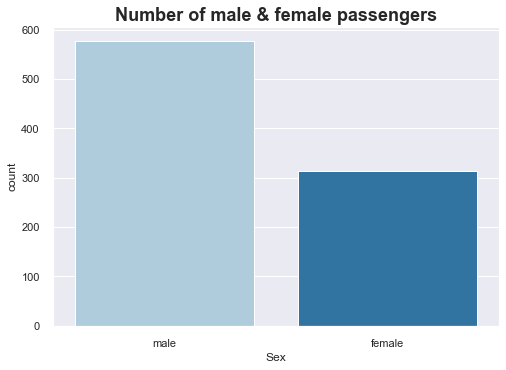

In [9]:
# Plotting the above
sns.set(style = 'darkgrid')
sns.countplot('Sex', data = titanic, palette = 'Paired')
plt.title('Number of male & female passengers',fontdict={'fontweight': 'bold',
                                              'fontsize': 18})

plt.show()

#### Question 4: How many survived, by gender

In [10]:
titanic.groupby(['Sex','Survived'])['Survived'].size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

###### Analysis
From the above results it is clear that survived more females than males. The survival ration of females is greater than the survival ration of males.

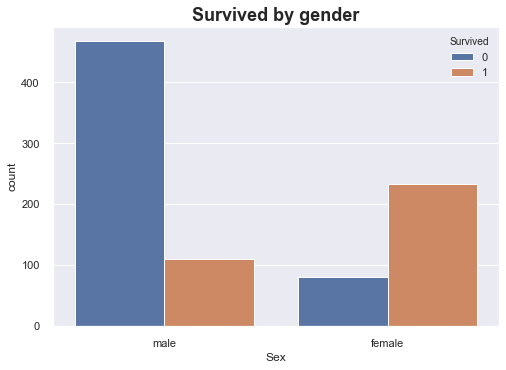

In [11]:
# Plotting the above results
sns.countplot('Sex', hue = 'Survived', data = titanic)
plt.title('Survived by gender',fontdict={'fontweight': 'bold',
                                              'fontsize': 18})
plt.show()

#### Question 5: How many passengers of each pclass survevd?

In [12]:
titanic.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [13]:
# Calculating the pecentage survived for each pclass
t = titanic.groupby(['Pclass','Survived'])['Survived'].count()
t = pd.DataFrame(t)
t = t.unstack()

# we calculate the percentage of each class by column and by row
col = t.iloc[:,0:].apply(lambda x: (x/x.sum())*100)
row = t.iloc[:,0:].apply(lambda x: (x/x.sum())*100, axis = 1)
print('PERCENTAGE BY ROW')
print(col,'\n')
print('PERCENTAGE BY COLUMN')
print(row)

PERCENTAGE BY ROW
           Survived           
Survived          0          1
Pclass                        
1         14.571949  39.766082
2         17.668488  25.438596
3         67.759563  34.795322 

PERCENTAGE BY COLUMN
           Survived           
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


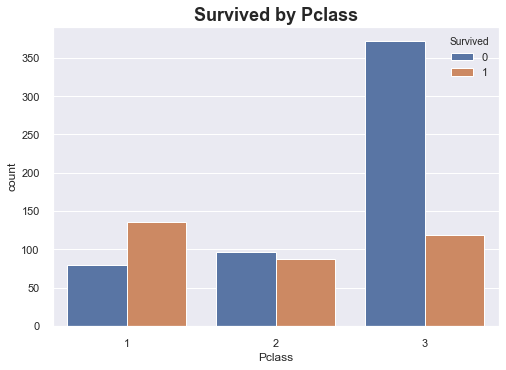

In [14]:
sns.countplot('Pclass', hue = 'Survived', data = titanic)
plt.title('Survived by Pclass',fontdict={'fontweight': 'bold',
                                              'fontsize': 18})
plt.show()

###### Analysis
The bar chart shows that the highest number of not survivals is for passengers with 3rd pclass and the lowest is for 1st class. On the other hand, the highest number of survivals is for 1st class passengers and the lowest numbers is observed on 2nd class passengers. 
We empower our conclusion by calculating the percentage of survived and non survived by class and we conclude in the same result.
Also, almost 63% of 1st class passengers survived, while 75% of 3rd class passengers did not survived.

#### Question 6: Combine gender / survived and classes

In [15]:
pd.crosstab([titanic.Sex, titanic.Survived], titanic.Pclass,
            margins=True).style.background_gradient(cmap = 'summer')

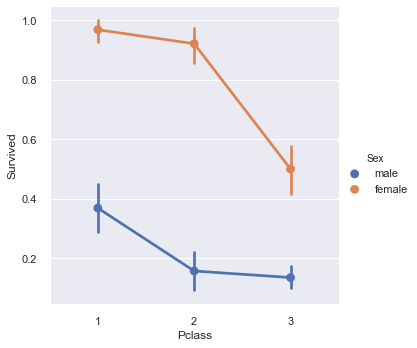

In [16]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data = titanic)
plt.show()

###### Analysis
The plot shows the rate of survived passengeres on each class separated by gender. It is clear that in all cases rate of female apssengers who surveved is greater than men passengers. It is also clear that in both cases for females and males, the highest number of passengers who survived comes from class 1. 

#### Question 7: Replace nan values in age column by the mean value of the column

In [17]:
# Calculate the mean of the column Age
mean = titanic.Age.mean()

# Replace every nan value with the mean
titanic['Age'].fillna(mean, inplace=True)

# Change the dtype of the column from float to int
titanic['Age'] = titanic.Age.astype('int')

#### Question 8: Statistics about age and Plotting 

In [18]:
max = titanic.Age.max()
min = titanic.Age.min()
mean = titanic.Age.mean()
median = titanic.Age.median()
std = titanic.Age.std()

print('The oldest passenger: ', max)
print('The yougest passenger: ', min)
print('The mean age of passengers: ', mean)
print('The median value of ages: ', median)
print('The std of ages: ', std)

The oldest passenger:  80
The yougest passenger:  0
The mean age of passengers:  29.544332210998878
The median value of ages:  29.0
The std of ages:  13.013778302447077


###### Analysis
The mean and the median are equal, that means that we have a normal distribution!

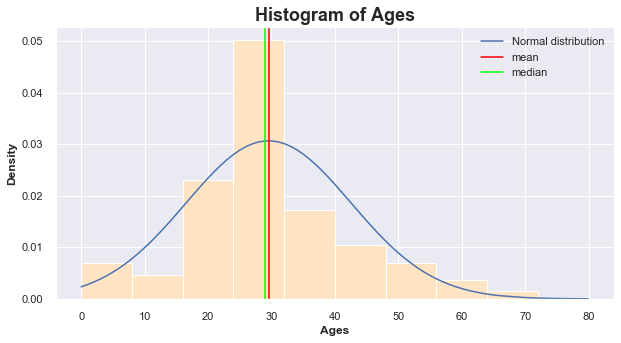

In [19]:
plt.figure(figsize=(10,5))

# From column titanic.Age, save them in a variable and sort all of them
age = titanic.Age.sort_values()
fit = norm.pdf(age,mean,std)

plt.plot(age, fit,label='Normal distribution') # plot the line of normal distribution
plt.hist(age, normed=True, color = 'bisque') # plot the hist
plt.axvline(mean, color = 'red', label = 'mean') # plot the mean line
plt.axvline(median, color = 'lime', label = 'median') # plot the mean line


plt.title('Histogram of Ages',fontdict={'fontweight': 'bold',                                       'fontsize': 18})
plt.xlabel('Ages', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')

plt.legend()
plt.show()

#### Question 9: Relationship between age and survived

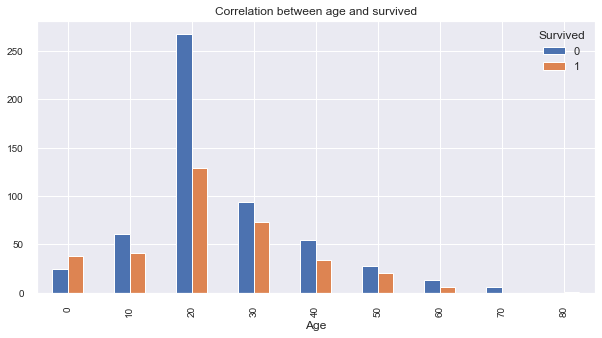

In [52]:
# Plot the bar chart that shows how many survived depending their age
w = pd.crosstab(titanic.Age//10*10, titanic.Survived) # separate the passengers 
# on decates
w.plot(kind = 'bar', title = 'Correlation between age and survived', fontsize = 10,
      figsize = (10,5))
plt.show()

###### Analysis
From the above chart it is clear that most passengers did not survived regardless the age group they belong. The biggest difference between the passengers who survived and them who did not, is observed in the range from 20 to 30 years old. The only exception is shown in younger ages and especially from 0 to 10. Among these ages, the number of passengers who survived is greater than the ones who did not. On the other hand from 20 to 30 there is the biggest difference between those who did not survived and those who survived. The most passengers who survived and also the passengers who did not achive to survive, both of them are in the same age group. Between 20 and 30. 
###### Notice!
In the initial dataset there were 177 non value rows in the age column, that means about 20% of the whole rows. I replaced all these non rows with the mean value of all the other rows of the column. 

#### Question 10: Relationship between class and age

In [62]:
ap = pd.crosstab()
ap

Pclass,1,2,3
Age,,,
0,3,17,42
10,18,18,66
20,64,64,269
30,50,48,69
40,37,18,34
50,27,15,6
60,13,3,3
70,3,1,2
80,1,0,0


From the table we can discern that passengers who are older than 40 prefer 1st class in contrast with most younger passengers who prefer 3rd class. 

#### Question 11: Calculate the family members

In [89]:
titanic.SibSp.value_counts().sort_index(ascending = True)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

Most of the passengers traveled alone.

#### Question 12: Family members and Pclasses

In [108]:
pd.crosstab(titanic.SibSp, titanic.Survived,
           normalize='index', margins=True).style.background_gradient('Greens')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.75,0.25
4,0.833333,0.166667
5,1,0
8,1,0
All,0.616162,0.383838


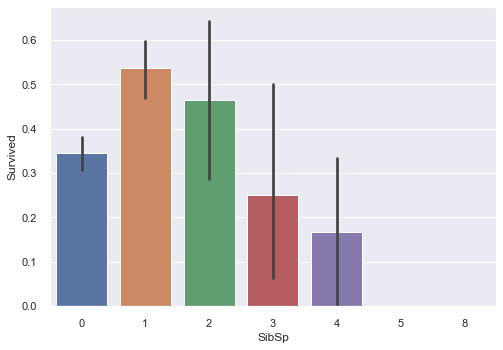

In [99]:
sns.barplot('SibSp', 'Survived', data = titanic)
plt.show()

The highest chances for survival have the the passengers who have only one sigbling onboard. As the number of siblings increase, the graph dicreases. So, the chances of survival in big families is low. Especially, in big families with 5 and 8 members there is no member who survived. Another parameter that we have to take into account is the fact that most big families have been 3rd class and as we saw above priority for survival had 1st class and 2nd class. 